# Viano (1989): Hub impacts

```{note}
- Oblique Hub Impact to thorax and abdomen 
- lateral impact to  pelvis
```



- Performed by: Yash Niranjan Poojary
- Reviewed by:
- Last modified : 8th January 2024
- SAFER HBM Version: ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `

## Experiment by Viano (1989)
### Summary:

The simulated outputs are compared to the references from PMHS tests reported by Viano  <sup>[1]</sup>
1. Viano, David C. "Biomechanical responses and injuries in blunt lateral impact." SAE transactions (1989): 1690-1719.[Article](https://www.jstor.org/stable/pdf/44472411.pdf)

```{figure} ../_env/setup_viano_hub_S11.png
---
align: center
---
Hub impact to Thorax, abdomen and hip
```

### Information on the subjects/specimens

| **Runs** | **Cadaver #** | **Sex** | **Age [years]** | **Weight [kg]** | **Height [cm]** |
|:--------:|:-------------:|:-------:|:---------------:|:---------------:|:---------------:|
|     2    |      863      |   Male  |        49       |       107       |       176       |
|     3    |      RNY1     |  Female |        76       |        44       |      153.5      |
|     4    |      935      |   Male  |        63       |      69.85      |       174       |
|    5,6   |      947      |   Male  |        38       |      56.25      |      166.5      |
|    7,8   |      954      |   Male  |        66       |      56.25      |       159       |
|    9,10   |      RNY2     |   Male  |        64       |      61.69      |       171       |
|   11-13  |      956      |  Female |        40       |       76.2      |       175       |
|   14-16  |      993      |   Male  |        49       |      70.76      |       173       |
|   17-22  |      986      |   Male  |        29       |       70.3      |       173       |
|   23-28  |      047      |   Male  |        62       |      83.91      |      176.5      |
|   29-33  |      008      |  Female |        52       |      53.07      |       157       |
|   34,35  |      063      |   Male  |        64       |      48.54      |       173       |
|   36-39  |      UOM1     |   Male  |        37       |      67.59      |      186.5      |
|   40,45  |      UOM2     |   Male  |        64       |      75.76      |      178.5      |
### Loading and Boundary Conditions
- Tests on 15 specimens
### Boundary Conditions
- `Coordinate system `              : aligned with Global in simulations
#### Setup for oblique Abdomen and Thorax impact
 - Impactor dimensions      : `MAT_RIGID` cylinder wirg diameter $150mm$, height $60mm$ and mass $23.4kg$
 - Impact location                    : Center of the pendulum aligned with Xiphoid process for thoracic impact and 75mm below for abdomen impact and rotated $30^0$
 - Contacts                        : `*CONTACT_AUTOMATIC_SURFACE_TO_SURFACE` with $fs=0.3 , vdc=20, soft=2$ between the impator and the HBM (without the arms `PID`).
 - `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of impactor at 4.4 m/s, 6.5m/s and 9.5 m/s
 - No gravity defined
##### Other comments
- The impactor in the tests are aligned to the Xiphoid process, which is 75 mm below the geometrial center of the sternum [1].
- In the SAFER HBM the mid point of the Xiphoid proces and the sternum is 78 mm apart.
- All the simulations for the thoracic impact is aligned to the center of the Xiphoid proces in the FE model.

#### Setup for lateral Hub impact
 - Impactor dimensions      : `MAT_RIGID` cylinder wirg diameter $150mm$, height $60mm$ and mass $23.4kg$
 - Impact location                    : 90° with the impactor centered on the greater trochanter.

 - Contacts                        : `*CONTACT_AUTOMATIC_SURFACE_TO_SURFACE` with $fs=0.3 , vdc=20, soft=2$ between the impator and the HBM (without the arms `PID`).
 - `*BOUNDARY_PRESCRIBED_MOTION_RIGID` define constant displacement rate of impactor at : 5.2 m/s and 9.8 m/s.
 - No gravity defined
 
### Responses recorded
- Contact force is measured at the impactor and HBM.
- Rigid impactor displacement

The reference values from the paper were digitalised and are incuded in the notebook. The data corresponds to the unnormalised corridors.


In [1]:
import os
import glob
import sys
# for data analysis
import pandas as pd
import numpy as np
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs = {"linestyle" :'--', "color" : 'b',"alpha" : 0.7,"linewidth":1}
pmhs_i = {"linestyle" :'--', "color" : 'b',"alpha" : 0.5,"linewidth":1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" : 0.5,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.5,"linewidth":1}
pmhs_average = {"linestyle" :'-.', "color" : 'k',"alpha" : 1,"linewidth":1, 'marker' :"o", 'markevery': 75}
test_corr = {"color": 'grey',"alpha" : 0.4}
test_lim = {"marker" :'o',"linestyle":'--',"color": 'grey',"alpha" : 1}
# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [33]:
binout_path_sim={}
result_output_dir={}

Tests=["Thorax_4.4","Thorax_6.5", "Thorax_9.5" ,"Abdomen_4.8","Abdomen_6.8", "Abdomen_9.4","Pelvis_5.2","Pelvis_9.8"]
# Tests=["Pelvis_5.2","Pelvis_9.8"]

figures_dir = "../data/processed/SAFER_11.0/results/figures/"
processed_data_dir = f"../data/processed/SAFER_11.0/"
experiment_dir= "../data/experiment_data/"

if not os.path.exists(figures_dir): 
    os.makedirs(figures_dir)
if not os.path.exists(processed_data_dir): 
    os.makedirs(processed_data_dir)

for test in Tests:
    binout_path_sim[test] = test
    result_output_dir[test] = os.path.join(processed_data_dir, binout_path_sim[test])
    if not os.path.exists(result_output_dir[test]): 
        os.makedirs(result_output_dir[test])


## Postprocessing with dynasaur

In [34]:
# Import the dynasaur library
from dynasaur.plugins.data_visualization_controller import DataVisualizationController

In [35]:
# Path to Dynasaur definition files

# Dynasaur object definitions
dynasaur_ids = ["../_env/01_impactor_IDs.def","../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def"]

# Dynasaur calculation definitions
dynasaur_calculation_defs = [ "../_env/02_Calculation_procedures.def","../../model/SAFER_11.0/postprocessing/01_energy_calculation.def" ,"../../model/SAFER_11.0/postprocessing/20_rib_strain_calculator.def"]
# dynasaur_calculation_defs = [ "../_env/02_Calculation_procedures.def","../_env/energy_calc.def"]

In [36]:
sim_output={}
for test in Tests:
    sim = DataVisualizationController(calculation_procedure_def_file=dynasaur_calculation_defs,
                                                  object_def_file=dynasaur_ids,
                                                  data_source= binout_path_sim[test] +'/binout*')
    commands = sim.get_defined_calculation_procedures()
    print(commands)
    for command in sim.get_defined_calculation_procedures():
        sim.calculate(command)
    sim.write_CSV(result_output_dir[test], filename="Dynasaur_output.csv")

    sim_output[test]=pd.read_csv(os.path.join(result_output_dir[test],"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/01_energy_calculation.def
[READ DYNASAUR DEF]	done
[READ DYNASAUR DEF]	read ../_env/01_impactor_IDs.def
[READ DYNASAUR DEF]	read ../../model/SAFER_11.0/postprocessing/21_rib_strain_parts.def
[READ DYNASAUR DEF]	done
[READ BINOUT]	read rcforc data ...
[READ BINOUT]	done reading rcforc!
[READ BINOUT]	read nodout data ...
[READ BINOUT]	done reading nodout!
[READ BINOUT]	read glstat data ...
[READ BINOUT]	done reading glstat!
[{'visualization': 'IMPACTOR_Contactforce_impactor_to_HBM_CFC_180', 'x_label': 'time', 'y_label': 'force'}, {'visualization': 'IMPACTOR_Disp_x', 'x_label': 'time', 'y_label': 'displacement'}, {'visualization': 'MODEL_Added_Mass', 'x_label': 'time', 'y_label': 'mass'}, {'visualization': 'MODEL_Total_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualization': 'MODEL_Internal_Energy', 'x_label': 'time', 'y_label': 'energy'}, {'visualizatio

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Thorax_4.4
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Thorax_4.4\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Thorax_6.5
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Thorax_6.5\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Thorax_9.5
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Thorax_9.5\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Abdomen_4.8
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Abdomen_4.8\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR D

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Abdomen_6.8
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Abdomen_6.8\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR D

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Abdomen_9.4
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Abdomen_9.4\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR D

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Pelvis_5.2
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Pelvis_5.2\Dynasaur_output.csv
[READ DYNASAUR DEF]	read ../_env/02_Calculation_procedures.def
[READ DYNASAUR DEF

c:\Users\yash\Anaconda3\envs\SOT\lib\site-packages\dynasaur\calc\cfc.py:66: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  sampled_array = np.array(sampled_array)


[CALCULATION]	Calculating Visualization: IMPACTOR_Disp_x
[DATA]	read id 9010000 from channel name: x_displacement
[CALCULATION]	Calculating Visualization: MODEL_Added_Mass
[DATA]	ENERGY_GLOBAL read from channel name: added_mass
[CALCULATION]	Calculating Visualization: MODEL_Total_Energy
[DATA]	ENERGY_GLOBAL read from channel name: total_energy
[CALCULATION]	Calculating Visualization: MODEL_Internal_Energy
[DATA]	ENERGY_GLOBAL read from channel name: internal_energy
[CALCULATION]	Calculating Visualization: MODEL_Kinetic_Energy
[DATA]	ENERGY_GLOBAL read from channel name: kinetic_energy
[CALCULATION]	Calculating Visualization: MODEL_Hourglass_Energy
[DATA]	ENERGY_GLOBAL read from channel name: hourglass_energy
[CALCULATION]	DATA VISUALIZATION writing csv to ../data/processed/SAFER_11.0/Pelvis_9.8
[CALCULATION]	DATA VISUALIZATION done writing csv to ../data/processed/SAFER_11.0/Pelvis_9.8\Dynasaur_output.csv


In [37]:
# Experiment data
TX_4_4=pd.read_csv(os.path.join(experiment_dir,'TX_4.4.csv'), delimiter=';',na_values='-')
TX_6_5=pd.read_csv(os.path.join(experiment_dir,'TX_6.5.csv'), delimiter=';',na_values='-')
TX_9_5=pd.read_csv(os.path.join(experiment_dir,'TX_9.5.csv'), delimiter=';',na_values='-')
Thorax_Exp=pd.read_csv(os.path.join(experiment_dir,'Thorax.csv'), delimiter=';',na_values='-')
Abdomen_Exp=pd.read_csv(os.path.join(experiment_dir,'abdomen.csv'), delimiter=';',na_values='-')
AB_4_8=pd.read_csv(os.path.join(experiment_dir,'AB_4.8.csv'), delimiter=';',na_values='-')
AB_6_8=pd.read_csv(os.path.join(experiment_dir,'AB_6.8.csv'), delimiter=';',na_values='-')
AB_9_4=pd.read_csv(os.path.join(experiment_dir,'AB_9.4.csv'), delimiter=';',na_values='-')

PL_5_2=pd.read_csv(os.path.join(experiment_dir,'PL_5.2.csv'), delimiter=';',na_values='-', header = [0,1,2])
PL_9_3=pd.read_csv(os.path.join(experiment_dir,'PL_9.8.csv'), delimiter=';',na_values='-', header = [0,1,2])

In [38]:
## Resample data
def resam(xdata,ydata,endtime):
    x = xdata
    y = ydata
    # Interpolate the data to the desired length
    newx = np.arange(0,endtime,0.1)#10kHz resolution
    newy = np.interp(newx, x, y)
    return np.array(newx).flatten(),np.array(newy).flatten()

In [39]:
TX_t_4_4=[17,36,40,41]
TX_t_6_5=[5,7,9]
TX_t_9_5=[2,14,18,33,37]
AB_t_4_8=[19,23,24,42,43]
AB_t_6_8=[6,8,10]
AB_t_9_4=[15,20,28,34]

df_res = pd.DataFrame(columns=['Impact velocity','Ref Test','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])


T_samp=np.arange(0,60,0.1)
df=pd.DataFrame(T_samp)
test_average={}
for test in Tests:
    df=pd.DataFrame(T_samp)
    if test=="Thorax_4.4":
        test_nr= TX_t_4_4
        data=TX_4_4
    elif test=="Thorax_6.5":
        test_nr= TX_t_6_5
        data=TX_6_5
    elif test=="Thorax_9.5":
        test_nr= TX_t_9_5
        data=TX_9_5
    if test=="Abdomen_4.8":
        test_nr= AB_t_4_8
        data=AB_4_8
    elif test=="Abdomen_6.8":
        test_nr= AB_t_6_8
        data=AB_6_8
    elif test=="Abdomen_9.4":
        test_nr= AB_t_9_4
        data=AB_9_4
    for i in test_nr:
        exp_t=data['R_{}_t'.format(i)].dropna()
        exp_v=data['R_{}_f'.format(i)].dropna()
        r_t,r_v=resam(exp_t,exp_v,60)
        df[i]=r_v
    test_average[test]=df.iloc[:,1:].mean(axis=1)
    
    
experimental_data={}

experimental_data['Pelvis_5.2']=PL_5_2['Force'][['21','25','26','31']]
experimental_data['Pelvis_9.8']=PL_9_3['Force'][['22','27','32','39']]

endT=[46,27.5]
positions=['Pelvis_5.2','Pelvis_9.8']
i=0
for pos in positions:
    T_samp=np.arange(0,endT[i],0.1)
    df=pd.DataFrame(T_samp)
    df_test=experimental_data[pos]
    for p in range(0,len(df_test.keys()),2):
        exp_t=df_test[df_test.keys()[p][0]].X.dropna()
        exp_v=df_test[df_test.keys()[p][0]].Y.dropna()
        r_t,r_v=resam(exp_t,exp_v,endT[i])
        df[p]=r_v
    test_average[pos]=df.mean(axis=1)
    i=i+1

## Thorax Impact response
### Force deflection Plot

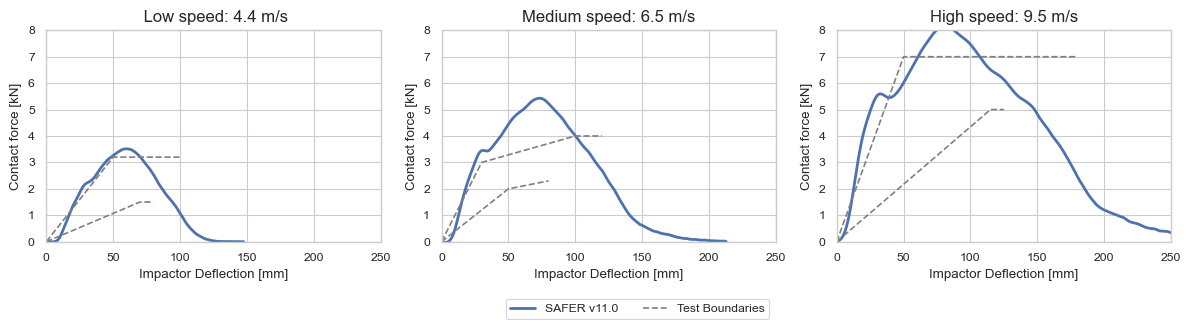

In [40]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))
for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('Impactor Deflection [mm]');

axs[0].set_title(' Low speed: 4.4 m/s',fontsize=12)
axs[0].plot(-(sim_output["Thorax_4.4"]['IMPACTOR']['Disp_x']['displacement']), 
            sim_output["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11, label = "SAFER v11.0")
axs[0].plot(Thorax_Exp['Thorax_LS:Deflection [cm]']*10, Thorax_Exp['Thorax_LS:Force_D [kN]'],'--',color='grey', label = "Test Boundaries")
axs[0].set_ylim([0,8])
axs[0].set_xlim([0,250])
    
axs[1].set_title('Medium speed: 6.5 m/s',fontsize=12)
axs[1].plot(-(sim_output["Thorax_6.5"]['IMPACTOR']['Disp_x']['displacement']), sim_output["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[1].plot(Thorax_Exp['Thorax_MS:Deflection [cm]']*10, Thorax_Exp['Thorax_MS:Force_D [kN]'],'--',color='grey')
axs[1].set_ylim([0,8])
axs[1].set_xlim([0,250])

axs[2].set_title('High speed: 9.5 m/s',fontsize=12)
axs[2].plot(-(sim_output["Thorax_9.5"]['IMPACTOR']['Disp_x']['displacement']), sim_output["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[2].plot(Thorax_Exp['Thorax_HS:Deflection [cm]']*10, Thorax_Exp['Thorax_HS:Force_D [kN]'],'--',color='grey')
axs[2].set_ylim([0,8])
axs[2].set_xlim([0,250])

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=2)
fig_fd.tight_layout()

### Force Time Plot

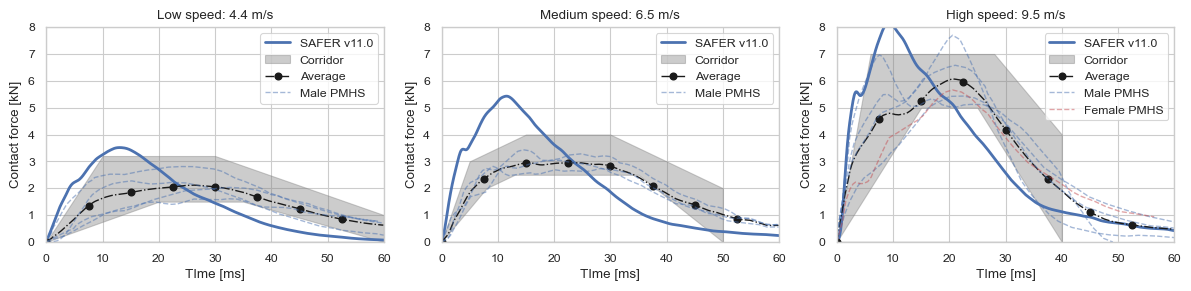

In [41]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))

for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,8])
    axs[i].set_xlim([0,60])

axs[0].set_title('Low speed: 4.4 m/s')
axs[0].plot(sim_output["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-2, sim_output["Thorax_4.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].fill_between(Thorax_Exp['Thorax_LS:Time [ms]'], Thorax_Exp['Thorax_LS:Force [kN]'], label = "Corridor",**test_corr)
axs[0].plot(np.arange(0,60,0.1),test_average["Thorax_4.4"], label = "Average",**pmhs_average)
axs[0].plot(TX_4_4['R_17_t'], TX_4_4['R_17_f'], label = "Male PMHS ",**pmhsM)
axs[0].plot(TX_4_4['R_36_t'], TX_4_4['R_36_f'],**pmhsM)
axs[0].plot(TX_4_4['R_40_t'], TX_4_4['R_40_f'],**pmhsM)
axs[0].plot(TX_4_4['R_41_t'], TX_4_4['R_41_f'],**pmhsM)
axs[0].legend()
# axs[0].set_ylim([0,4])
    
axs[1].set_title('Medium speed: 6.5 m/s')
axs[1].plot( sim_output["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, sim_output["Thorax_6.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].fill_between(Thorax_Exp['Thorax_MS:Time [ms]'], Thorax_Exp['Thorax_MS:Force [kN]'], label = "Corridor",**test_corr)
axs[1].plot(np.arange(0,60,0.1),test_average["Thorax_6.5"], label = "Average",**pmhs_average)
axs[1].plot(TX_6_5['R_5_t'], TX_6_5['R_5_f'], label = "Male PMHS",**pmhsM)
axs[1].plot(TX_6_5['R_7_t'], TX_6_5['R_7_f'], **pmhsM)
axs[1].plot(TX_6_5['R_9_t'], TX_6_5['R_9_f'],**pmhsM)
axs[1].legend()
# axs[1].set_ylim([0,5])

axs[2].set_title('High speed: 9.5 m/s')
axs[2].plot(sim_output["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time'], sim_output["Thorax_9.5"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[2].fill_between(Thorax_Exp['Thorax_HS:Time [ms]'], Thorax_Exp['Thorax_HS:Force [kN]'], label = "Corridor",**test_corr)
axs[2].plot(np.arange(0,60,0.1),test_average["Thorax_9.5"], label = "Average",**pmhs_average)
axs[2].plot(TX_9_5['R_2_t'], TX_9_5['R_2_f'], label = "Male PMHS",**pmhsM)
axs[2].plot(TX_9_5['R_14_t'], TX_9_5['R_14_f'],**pmhsM)
axs[2].plot(TX_9_5['R_18_t'], TX_9_5['R_18_f'],**pmhsM)
axs[2].plot(TX_9_5['R_33_t'], TX_9_5['R_33_f'],**pmhsF, label = "Female PMHS")
axs[2].plot(TX_9_5['R_37_t'], TX_9_5['R_37_f'],**pmhsM)
# axs[2].set_ylim([0,8])
axs[2].legend()
fig_fd.tight_layout()


## Abdomen Impact response
### Force deflection Plot

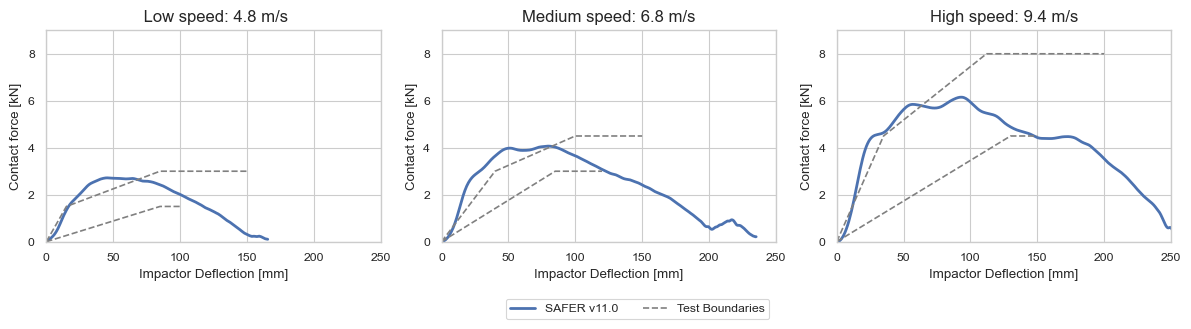

In [42]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))
for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('Impactor Deflection [mm]');
    
axs[0].set_title(' Low speed: 4.8 m/s',fontsize=12)
axs[0].plot(-sim_output["Abdomen_4.8"]['IMPACTOR']['Disp_x']['displacement']-10, sim_output["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11, label = "SAFER v11.0")
axs[0].plot(Abdomen_Exp['LS_D']*10, Abdomen_Exp['LS_Fd'],'--',color='grey', label = "Test Boundaries")
axs[0].set_ylim([0,9])
axs[0].set_xlim([0,250])
    
axs[1].set_title('Medium speed: 6.8 m/s',fontsize=12)
axs[1].plot(-sim_output["Abdomen_6.8"]['IMPACTOR']['Disp_x']['displacement']-7, sim_output["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[1].plot(Abdomen_Exp['MS_D']*10, Abdomen_Exp['MS_Fd'],'--',color='grey')
axs[1].set_ylim([0,9])
axs[1].set_xlim([0,250])

axs[2].set_title('High speed: 9.4 m/s',fontsize=12)
axs[2].plot(-sim_output["Abdomen_9.4"]['IMPACTOR']['Disp_x']['displacement']-5, sim_output["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'],**s11)
axs[2].plot(Abdomen_Exp['HS_D']*10, Abdomen_Exp['HS_Fd'],'--',color='grey')
axs[2].set_ylim([0,9])
axs[2].set_xlim([0,250])

fig_fd.legend( bbox_to_anchor=(0.65,0.01),ncols=2)
fig_fd.tight_layout()


### Force Time Plot

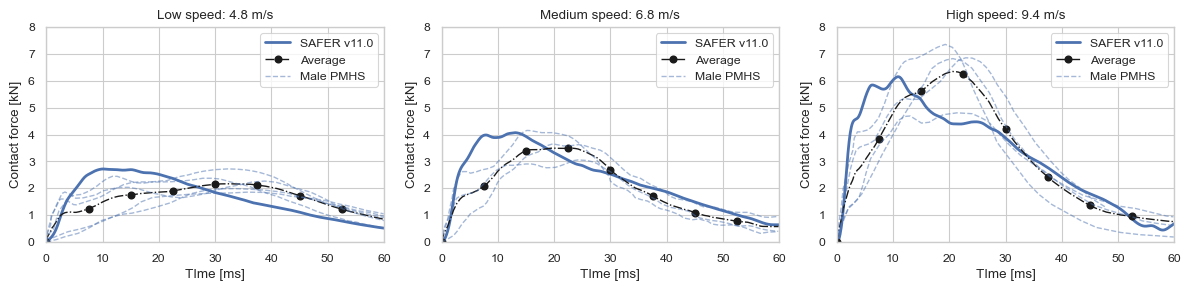

In [43]:
fig_fd, axs = plt.subplots(nrows=1, ncols=3,figsize=(12,3))

for i in range(0,3):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,8])
    axs[i].set_xlim([0,60])


axs[0].set_title('Low speed: 4.8 m/s')
axs[0].plot(sim_output["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-2, sim_output["Abdomen_4.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].plot(np.arange(0,60,0.1),test_average["Abdomen_4.8"], label = "Average",**pmhs_average)
axs[0].plot(AB_4_8['R_19_t'], AB_4_8['R_19_f'], **pmhsM, label = "Male PMHS")
axs[0].plot(AB_4_8['R_23_t'], AB_4_8['R_23_f'], **pmhsM)
axs[0].plot(AB_4_8['R_24_t'], AB_4_8['R_24_f'], **pmhsM)
axs[0].plot(AB_4_8['R_42_t'], AB_4_8['R_42_f'], **pmhsM)
axs[0].plot(AB_4_8['R_43_t'], AB_4_8['R_43_f'], **pmhsM)
axs[0].legend()
    
axs[1].set_title('Medium speed: 6.8 m/s')
axs[1].plot( sim_output["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, sim_output["Abdomen_6.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].plot(np.arange(0,60,0.1),test_average["Abdomen_6.8"], label = "Average",**pmhs_average)
axs[1].plot(AB_6_8['R_6_t'], AB_6_8['R_6_f'],**pmhsM, label = "Male PMHS")
axs[1].plot(AB_6_8['R_8_t'], AB_6_8['R_8_f'],**pmhsM)
axs[1].plot(AB_6_8['R_10_t'], AB_6_8['R_10_f'], **pmhsM)
axs[1].legend()

axs[2].set_title('High speed: 9.4 m/s')
axs[2].plot(sim_output["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-0.5, sim_output["Abdomen_9.4"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[2].plot(np.arange(0,60,0.1),test_average["Abdomen_9.4"], label = "Average",**pmhs_average)
axs[2].plot(AB_9_4['R_15_t'], AB_9_4['R_15_f'], **pmhsM, label = "Male PMHS")
axs[2].plot(AB_9_4['R_20_t'], AB_9_4['R_20_f'], **pmhsM)
axs[2].plot(AB_9_4['R_28_t'], AB_9_4['R_28_f'], **pmhsM)
axs[2].plot(AB_9_4['R_34_t'], AB_9_4['R_34_f'], **pmhsM)
axs[2].legend()
fig_fd.tight_layout()




## Pelvis impact response
### Force time history

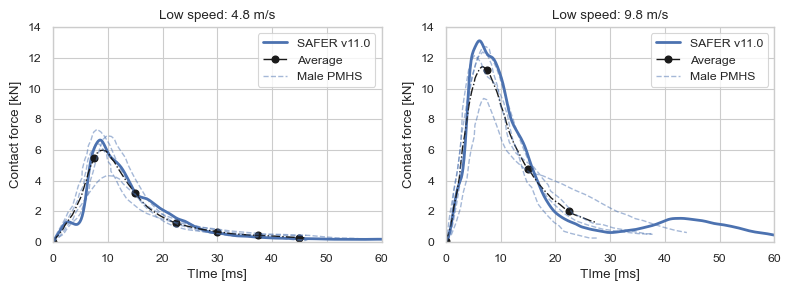

In [44]:
fig_fd, axs = plt.subplots(nrows=1, ncols=2,figsize=(8,3))

for i in range(0,2):
    axs[i].set_ylabel('Contact force [kN]');
    axs[i].set_xlabel('TIme [ms]');
    axs[i].set_ylim([0,14])
    axs[i].set_xlim([0,60])

axs[0].set_title('Low speed: 4.8 m/s')
axs[0].plot(sim_output["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-3, sim_output["Pelvis_5.2"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[0].plot(np.arange(0,46,0.1),test_average["Pelvis_5.2"], label = "Average",**pmhs_average)
axs[0].plot(PL_5_2.Force['21'].X, PL_5_2.Force['21'].Y, label = "Male PMHS",**pmhsM)
axs[0].plot(PL_5_2.Force['25'].X, PL_5_2.Force['25'].Y,**pmhsM)
axs[0].plot(PL_5_2.Force['26'].X, PL_5_2.Force['26'].Y,**pmhsM)
axs[0].plot(PL_5_2.Force['31'].X, PL_5_2.Force['31'].Y,**pmhsM)
axs[0].legend()
    
axs[1].set_title('Low speed: 9.8 m/s')
axs[1].plot(sim_output["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']-1, sim_output["Pelvis_9.8"]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force'], label = "SAFER v11.0",**s11)
axs[1].plot(np.arange(0,27.5,0.1),test_average["Pelvis_9.8"], label = "Average",**pmhs_average)
axs[1].plot(PL_9_3.Force['22'].X, PL_9_3.Force['22'].Y, label = "Male PMHS",**pmhsM)
axs[1].plot(PL_9_3.Force['27'].X, PL_9_3.Force['27'].Y,**pmhsM)
axs[1].plot(PL_9_3.Force['32'].X, PL_9_3.Force['32'].Y,**pmhsM)
axs[1].plot(PL_9_3.Force['39'].X, PL_9_3.Force['39'].Y, **pmhsM)
axs[1].legend()

fig_fd.tight_layout()

## Energy plots

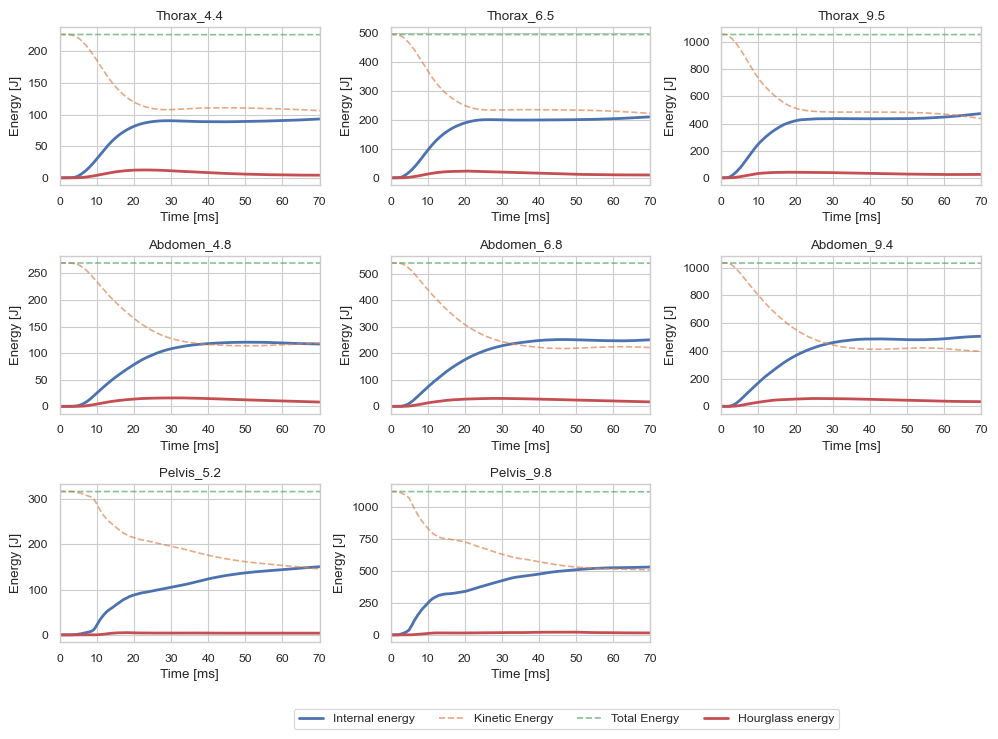

In [48]:
fig_fd, axs = plt.subplots(nrows=3, ncols=3,figsize=(10,7))
i=0
for ax in axs.flat:
    if i==8:
        fig_fd.delaxes(ax)
        break;
    ax.plot(sim_output[Tests[i]].MODEL.Internal_Energy.time,sim_output[Tests[i]].MODEL.Internal_Energy.energy,linewidth=2)
    ax.plot(sim_output[Tests[i]].MODEL.Kinetic_Energy.time,sim_output[Tests[i]].MODEL.Kinetic_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Total_Energy.time,sim_output[Tests[i]].MODEL.Total_Energy.energy,linestyle='--',alpha=0.7)
    ax.plot(sim_output[Tests[i]].MODEL.Hourglass_Energy.time,sim_output[Tests[i]].MODEL.Hourglass_Energy.energy,linewidth=2)
    ax.set(title="{}".format(Tests[i]),xlabel='Time [ms]',ylabel='Energy [J]',xlim=[0,70])
    i=i+1
fig_fd.legend(["Internal energy","Kinetic Energy","Total Energy","Hourglass energy"], bbox_to_anchor=(0.85,-0.01),ncol=4);
fig_fd.tight_layout()

## ISO18571 objective rating for force-time histories

In [49]:
# Import objective rating metric library
from objective_rating_metrics.rating import ISO18571

In [50]:
endT=[60,60,60,60,60,60,46,27.5]
dt=[-1,-1,0,-2,-1,-0.5,-3,-1]
i=0
df_res = pd.DataFrame(columns=['Impact velocity','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
for test in Tests:
    T_samp=np.arange(0,endT[i],0.1)
    sim_t=np.array(sim_output[test]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['time']+dt[i]).flatten()
    sim_v=np.array(sim_output[test]['IMPACTOR']['Contactforce_impactor_to_HBM_CFC_180']['force']).flatten()
    ref = np.vstack((T_samp, test_average[test])).T
    s_t,s_v=resam(sim_t,sim_v,endT[i])
    sim = np.vstack((s_t, s_v)).T
    iso_rating = ISO18571(reference_curve=ref, comparison_curve=sim)
    df_rate = pd.DataFrame(columns=['Impact velocity','Corridor Score', 'Phase Score', 'Magnitude Score', 'Slope Score', 'Overall Score'])
    df_rate['Impact velocity']=[test]
    df_rate['Corridor Score']=[iso_rating.corridor_rating()]
    df_rate['Phase Score']=[iso_rating.phase_rating()]
    df_rate['Magnitude Score']=[iso_rating.magnitude_rating()]
    df_rate['Slope Score']=[iso_rating.slope_rating()]
    df_rate['Overall Score']=[iso_rating.overall_rating()]
    df_res=pd.concat([df_res,df_rate], ignore_index=True)
    i=i+1
df_res.to_csv(os.path.join(processed_data_dir,"ISO.csv"))

Thorax 
 Average: 	 0.36 
 Range: 	 0.29-0.49
--------------------------------------------------------------
Abdomen 
 Average: 	 0.58 
 Range: 	 0.4-0.69
--------------------------------------------------------------


Pelvis 
 Average: 	 0.89 
 Range: 	 0.87-0.9


,Impact velocity,Corridor Score,Phase Score,Magnitude Score,Slope Score,Overall Score
0,Thorax_4.4,0.21,0.47,0.56,0.00,0.29
1,Thorax_6.5,0.27,0.40,0.55,0.00,0.30
2,Thorax_9.5,0.56,0.25,0.81,0.27,0.49
3,Abdomen_4.8,0.34,0.33,0.78,0.18,0.40
4,Abdomen_6.8,0.70,0.61,0.82,0.41,0.65
5,Abdomen_9.4,0.74,0.67,0.91,0.41,0.69
6,Pelvis_5.2,0.94,0.95,0.96,0.70,0.90
7,Pelvis_9.8,0.85,0.96,0.92,0.77,0.87


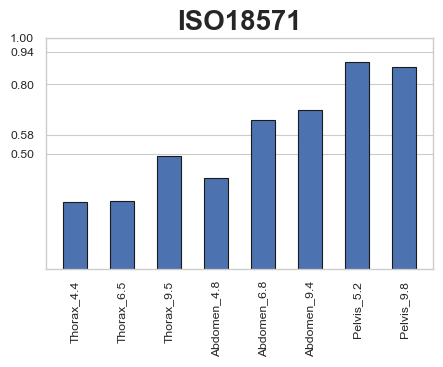

In [66]:
df_BC=df_res

B1={'width' : 0.5 , 'color':'b','alpha':1, 'edgecolor':'k'}
fig, ax = plt.subplots(figsize=(5, 3))
br1 = np.arange(len(df_BC))
ax.bar(br1,df_BC['Overall Score'].values,**B1)
plt.xticks(range(len(df_BC)), df_BC['Impact velocity'], rotation=90)
ax.set_ylim([0,1])
ax.set_yticks([0.5,0.58,0.80,0.94,1])
ax.grid(axis='x')
ax.set_title('ISO18571',fontsize=20,fontweight='bold')

df_BC_TX=df_res.iloc[:3]
print('{}Thorax{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_BC_TX['Overall Score'].mean().round(2),
                                           min(df_BC_TX['Overall Score'].round(2)),
                                           max(df_BC_TX['Overall Score'].round(2))))
print('--------------------------------------------------------------')
df_BC_AB=df_res.iloc[3:6]
print('{}Abdomen{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_BC_AB['Overall Score'].mean().round(2),
                                           min(df_BC_AB['Overall Score'].round(2)),
                                           max(df_BC_AB['Overall Score'].round(2))))
print('--------------------------------------------------------------')
df_BC_PL=df_res.iloc[6:]
print('{}Pelvis{} \n Average: \t {} \n Range: \t {}-{}'.format('\033[1m', '\033[0m',df_BC_PL['Overall Score'].mean().round(2),
                                           min(df_BC_PL['Overall Score'].round(2)),
                                           max(df_BC_PL['Overall Score'].round(2))))

df_BC.style.apply(select_col, axis=None).format(precision=2).set_caption("ISO 18571 results").set_table_styles(heading).set_properties(**content)

## Rib fractures

In [19]:
# import updated user functions for rib assessment
sys.path.append('../../model/SAFER_11.0/postprocessing/')
from fracture_risk_calculator import HBM_rib_risk

In [20]:
viano=HBM_rib_risk(sim_output)

### Thorax oblique impact
#### Low speed: 4.4 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
| :-------: | :-----------: | :-----: | :-------------: | :----------------------: | :---------------------: | :-----: |
|    41     |     U0M2      |  Male   |       64        |           3.8            |            0            |    0    |
|    40     |     U0M2      |  Male   |       64        |           3.82           |            2            |    2    |
|    36     |     U0M1      |  Male   |       37        |            4             |            0            |    0    |
|    29     |       8       | Female  |       52        |           5.2            |            0            |    0    |
|    17     |      986      |  Male   |       29        |           5.5            |            0            |    0    |

##### Rib strains

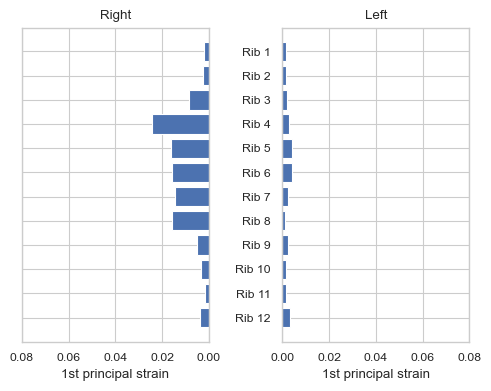

In [21]:
viano.plot_rib_strains("Thorax_4.4")

##### Fracture Risk

Test: NFR1+ [%],25.0
SHBM NFR1+ [%],39.6
Test: NFR2+ [%],25.0
SHBM NFR2+ [%],10.8
Test: NFR3+ [%],0.0
SHBM NFR3+ [%],2.0


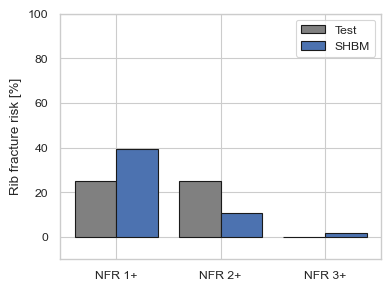

In [22]:
age=[64,64,37,29]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Thorax_4.4",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[25]
df_fractures['Test: NFR2+ [%]']=25
df_fractures['Test: NFR3+ [%]']=0
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

#### Medium speed: 6.5 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
|:---------:|:--------------:|:-------:|:---------------:|:------------------------:|:-----------------------:|:-------:|
|     4     |       935      |   Male  |        63       |           5.99           |            7            |    4    |
|     5     |       947      |   Male  |        38       |           6.48           |            3            |    3    |
|     9     |      RNY2      |   Male  |        64       |           6.71           |            5            |    5    |
|     11    |       956      |  Female |        40       |           6.71           |            5            |    5    |
|     7     |       954      |   Male  |        66       |           6.73           |            6            |    5    |
|     14    |       993      |   Male  |        49       |            8.3           |            6            |    6    |

##### Rib strains

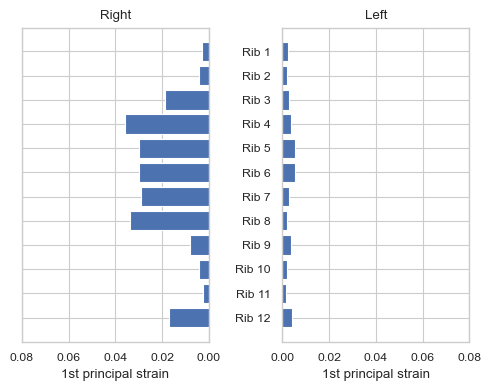

In [23]:
viano.plot_rib_strains("Thorax_6.5")

##### Fracture Risk

Test: NFR1+ [%],100.0
SHBM NFR1+ [%],99.6
Test: NFR2+ [%],100.0
SHBM NFR2+ [%],96.6
Test: NFR3+ [%],100.0
SHBM NFR3+ [%],87.9


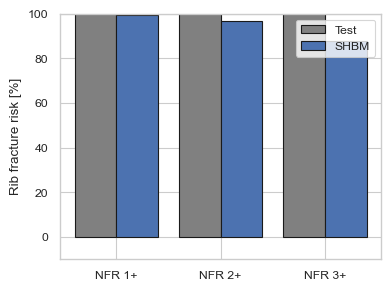

In [24]:
age=[63,38,64,66,49]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Thorax_6.5",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[100]
df_fractures['Test: NFR2+ [%]']=100
df_fractures['Test: NFR3+ [%]']=100
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

#### High speed: 9.5 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
|:---------:|:-------------:|:-------:|:---------------:|:------------------------:|:-----------------------:|:-------:|
|     3     |      RNY1     |  Female |        76       |            8.7           |            19           |    13   |
|     2     |      863      |   Male  |        49       |            9.4           |            14           |    14   |
|     18    |      986      |   Male  |        29       |            9.7           |            10           |    6    |
|     33    |       63      |   Male  |        64       |            9.7           |            12           |    12   |
|     37    |      U0M1     |   Male  |        37       |           10.2           |            15           |    11   |

##### Rib strains

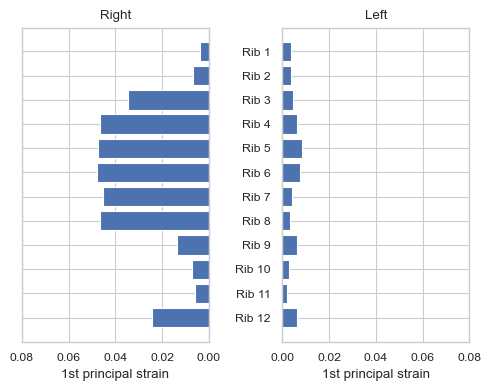

In [25]:
viano.plot_rib_strains("Thorax_9.5")

##### Fracture Risk

Test: NFR1+ [%],100.0
SHBM NFR1+ [%],100.0
Test: NFR2+ [%],100.0
SHBM NFR2+ [%],99.9
Test: NFR3+ [%],100.0
SHBM NFR3+ [%],99.4


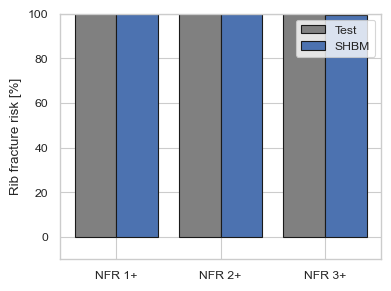

In [26]:
age=[49,29,64,37]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Thorax_9.5",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[100]
df_fractures['Test: NFR2+ [%]']=100
df_fractures['Test: NFR3+ [%]']=100
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

### Abdomen oblique impact
#### Low speed: 4.8 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
|:---------:|:-------------:|:-------:|:---------------:|:------------------------:|:-----------------------:|:-------:|
|     43    |      UOM2     |   Male  |        64       |            3.8           |            4            |    4    |
|     42    |      UOM2     |   Male  |        64       |           3.82           |            1            |    1    |
|     24    |       47      |   Male  |        62       |            5.4           |            0            |    0    |
|     23    |       47      |   Male  |        62       |            5.5           |            0            |    0    |

##### Rib strains

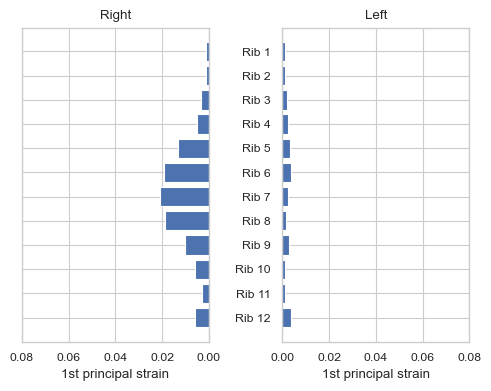

In [27]:
viano.plot_rib_strains("Abdomen_4.8")

##### Fracture Risk

Test: NFR1+ [%],50.0
SHBM NFR1+ [%],72.2
Test: NFR2+ [%],33.3
SHBM NFR2+ [%],28.1
Test: NFR3+ [%],33.3
SHBM NFR3+ [%],4.8


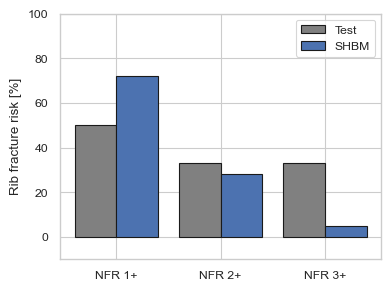

In [28]:
age=[64,64,62,62]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Abdomen_4.8",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[50]
df_fractures['Test: NFR2+ [%]']=33.3
df_fractures['Test: NFR3+ [%]']=33.3
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

#### Medium speed: 6.8 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
|:---------:|:-------------:|:-------:|:---------------:|:------------------------:|:-----------------------:|:-------:|
|     19    |      986      |   Male  |        29       |            6.1           |            0            |    0    |
|     30    |       8       |  Female |        52       |            6.1           |            0            |    0    |
|     8     |      954      |   Male  |        66       |           6.73           |            7            |    5    |
|     10    |      RNY2     |   Male  |        64       |           6.76           |            0            |    0    |
|     6     |      947      |   Male  |        38       |           6.79           |            4            |    3    |
|     12    |      956      |  Female |        40       |           7.08           |            2            |    2    |

##### Rib strains

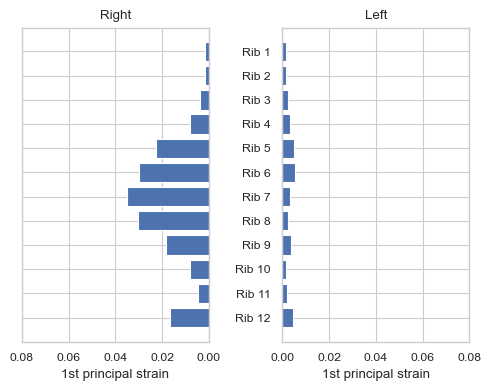

In [29]:
viano.plot_rib_strains("Abdomen_6.8")

##### Fracture Risk

Test: NFR1+ [%],50.0
SHBM NFR1+ [%],93.1
Test: NFR2+ [%],50.0
SHBM NFR2+ [%],74.4
Test: NFR3+ [%],50.0
SHBM NFR3+ [%],52.5


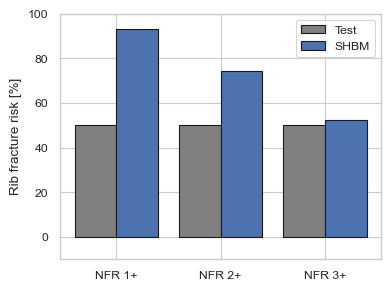

In [30]:
age=[29,66,64,38]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Abdomen_6.8",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[50]
df_fractures['Test: NFR2+ [%]']=50
df_fractures['Test: NFR3+ [%]']=50
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)

#### High speed: 9.4 m/s
- Only male PMHS are considered for injury validaton but the below table presents fractures for all tests.

| **Run #** | **cadaver #** | **Sex** | **Age [years]** | **impactor speed [m/s]** | **Number of fractures** | **NFR** |
|:---------:|:-------------:|:-------:|:---------------:|:------------------------:|:-----------------------:|:-------:|
|     15    |      993      |   Male  |        49       |            8.1           |            0            |    0    |
|     20    |      986      |   Male  |        29       |            9.8           |            9            |    7    |
|     34    |       63      |   Male  |        64       |            9.8           |            6            |    6    |
|     28    |       47      |   Male  |        62       |            9.9           |            0            |    0    |

##### Rib strains

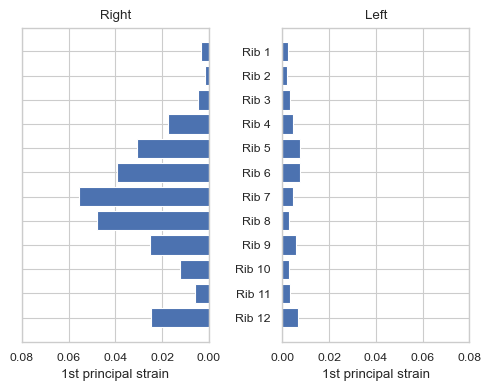

In [31]:
viano.plot_rib_strains("Abdomen_9.4")

##### Fracture Risk

Test: NFR1+ [%],50.0
SHBM NFR1+ [%],100.0
Test: NFR2+ [%],50.0
SHBM NFR2+ [%],99.0
Test: NFR3+ [%],50.0
SHBM NFR3+ [%],92.9


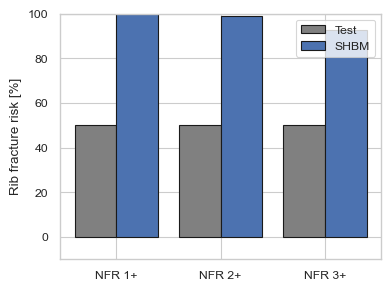

In [32]:
age=[49,29,64,62]
risks={}
for a in age:
    N1p,N2p,N3p=viano.fx_matrix("Abdomen_9.4",a)
    risks['NFR1+',a]=N1p
    risks['NFR2+',a]=N2p
    risks['NFR3+',a]=N3p
    
df_fractures = pd.DataFrame(columns=['Test: NFR1+ [%]', 'SHBM NFR1+ [%]','Test: NFR2+ [%]', 'SHBM NFR2+ [%]', 'Test: NFR3+ [%]','SHBM NFR3+ [%]'])
# df_fractures['Impact velocity']=[test]
df_fractures['Test: NFR1+ [%]']=[50]
df_fractures['Test: NFR2+ [%]']=50
df_fractures['Test: NFR3+ [%]']=50
df_fractures['SHBM NFR1+ [%]']=pd.DataFrame(risks)['NFR1+'].mean(axis=1).round(1)
df_fractures['SHBM NFR2+ [%]']=pd.DataFrame(risks)['NFR2+'].mean(axis=1).round(1)
df_fractures['SHBM NFR3+ [%]']=pd.DataFrame(risks)['NFR3+'].mean(axis=1).round(1)
viano.plot_PMHS_HBM_matrix(df_fractures)
df_fractures.T.style.hide(axis="columns").format(precision=1).set_caption("Injury Matrix").set_table_styles(heading).set_properties(**content)